In [3]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer  

In [4]:
import numpy as np
import pandas as pd 
import re

In [20]:
# df = pd.read_csv('./data/final_dataset_clean.csv')
# df = pd.read_csv('./data/final_dataset.csv')
df = pd.read_csv('./data/test_cleaned.csv.zip', usecols=['cleaned_text'])

In [5]:
def invalidity_clear(text):
    text = re.sub(r"https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)", '', text)
    text = re.sub(r'[^\w\s]', '', text, re.UNICODE)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r"<.*?>", ' ', text)
    text = re.sub(r"[^\u0000-\u007F]+?", " ", text)
    text = text.lower()
    text = text.strip()
    text 
    return text

In [6]:
def lemmatizer(text):
      stop_words=set(nltk.corpus.stopwords.words('english'))
      word_tokenize=nltk.tokenize.word_tokenize
      le=WordNetLemmatizer()
      word_tokens=word_tokenize(text)
      tokens=[le.lemmatize(w) for w in word_tokens if w not in stop_words and len(w)>3]
      cleaned_text=" ".join(tokens)
      return cleaned_text


In [24]:
df.dropna(inplace=True)
df.head()

,review
0,despite fact played small portion game music h...
1,bought charger worked design nice convenient h...
2,check maha energy website powerex mhcf charger...
3,reviewed quite combo player hesitant unfavorab...
4,also began incorrect disc problem read still w...


In [7]:
def clean_text(text):
    text = invalidity_clear(text)
    text = lemmatizer(text)
    print("Cleaned, tokenized and lemmatized:", text)
    return text

Document length analysis


In [209]:
count_array = np.array([])
for entry in df['review']:
    count_array = np.append(count_array, len(entry.split()))

In [210]:
def details(count_array):
    print("mean:", count_array.mean())
    print("std:", count_array.std())
    print("max:", count_array.max())
    print("min:", count_array.min())
    print("median:", np.median(count_array))
    print("25th percentile:", np.percentile(count_array, 25))
    print("50th percentile:", np.percentile(count_array, 50))
    print("75th percentile:", np.percentile(count_array, 75))
details(count_array)

mean: 15.933400824354617
std: 25.582906234232578
max: 642.0
min: 1.0
median: 7.0
25th percentile: 3.0
50th percentile: 7.0
75th percentile: 17.0


In [211]:
indices = np.where(count_array < 10)[0]
len(indices)
df.reset_index(drop=True, inplace=True)
details(np.array([len(entry.split()) for entry in df['review']]))

mean: 15.933400824354617
std: 25.582906234232578
max: 642
min: 1
median: 7.0
25th percentile: 3.0
50th percentile: 7.0
75th percentile: 17.0


<Axes: ylabel='count'>

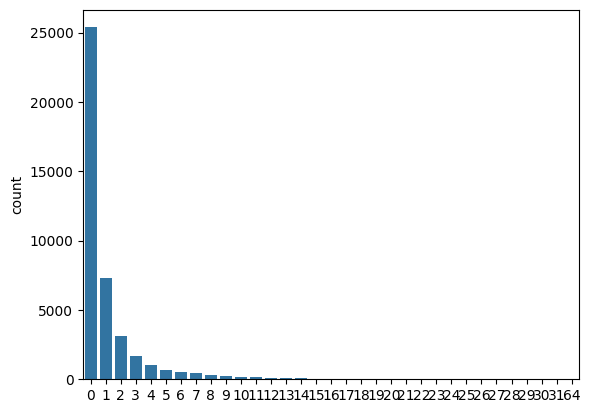

In [212]:
import seaborn as sns
labels = pd.cut(count_array, bins=range(0, int(max(count_array))+10, 10), labels=False)
sns.countplot(x=labels)

In [253]:
df.dropna(inplace=True)

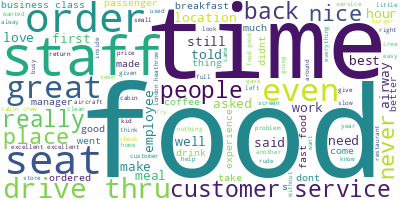

In [254]:
from wordcloud import WordCloud
long_string = ','.join(list(df['review']))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

In [8]:
import gensim as gs 

def get_corpus(df):
    corpus=[]
    for i in range(len(df)):
        corpus.append(df.iloc[i].split())
    return corpus
processed = get_corpus(df['review'])
dictionary = gs.corpora.Dictionary(processed)

NameError: name 'df' is not defined

In [26]:
count = 0
for k in dictionary.iteritems():
    print(k)
    count += 1
    if count > 10:
        break

(0, 'admit')
(1, 'album')
(2, 'beautiful')
(3, 'brought')
(4, 'chrono')
(5, 'collection')
(6, 'complaint')
(7, 'connection')
(8, 'consider')
(9, 'despite')
(10, 'distant')


In [28]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

In [29]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed]

In [30]:
bow_doc_69 = bow_corpus[69]

for i in range(len(bow_doc_69)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_69[i][0], 
                                                     dictionary[bow_doc_69[i][0]], 
                                                     bow_doc_69[i][1]))

Word 3 ("brought") appears 1 time.
Word 22 ("great") appears 2 time.
Word 39 ("small") appears 1 time.
Word 42 ("still") appears 1 time.
Word 65 ("look") appears 1 time.
Word 101 ("size") appears 1 time.
Word 289 ("product") appears 1 time.
Word 399 ("able") appears 1 time.
Word 414 ("high") appears 1 time.
Word 424 ("believe") appears 1 time.
Word 447 ("guide") appears 1 time.
Word 843 ("line") appears 1 time.
Word 1015 ("extremely") appears 1 time.
Word 1059 ("medium") appears 1 time.
Word 1202 ("difficult") appears 1 time.
Word 1219 ("according") appears 1 time.
Word 1220 ("assistance") appears 1 time.
Word 1221 ("contract") appears 1 time.
Word 1222 ("core") appears 1 time.
Word 1223 ("dress") appears 1 time.
Word 1224 ("flatten") appears 1 time.
Word 1225 ("friend") appears 1 time.
Word 1226 ("meant") appears 1 time.
Word 1227 ("measurement") appears 1 time.
Word 1228 ("needed") appears 3 time.
Word 1229 ("recommended") appears 1 time.
Word 1230 ("sits") appears 1 time.
Word 1231 

In [31]:
from gensim import corpora, models

tfidf = models.TfidfModel(bow_corpus)

In [32]:
corpus_tfidf = tfidf[bow_corpus]
corpus_tfidf[69]

[(3, 0.15646355167940612),
 (22, 0.10713067422935262),
 (39, 0.1083664700721051),
 (42, 0.08149336378794687),
 (65, 0.08563893364011392),
 (101, 0.12333130416868292),
 (289, 0.07528934390793135),
 (399, 0.11310021636902419),
 (414, 0.11309427030746126),
 (424, 0.11280724619812244),
 (447, 0.14302183603597132),
 (843, 0.11445860655397191),
 (1015, 0.12917009711956082),
 (1059, 0.16096293721032812),
 (1202, 0.1270852664092353),
 (1219, 0.18272616145491158),
 (1220, 0.2265464364616034),
 (1221, 0.22058585353335472),
 (1222, 0.19171408248545932),
 (1223, 0.20213465608343917),
 (1224, 0.2752195889484589),
 (1225, 0.10831291516858206),
 (1226, 0.16846653854952712),
 (1227, 0.22194721689157962),
 (1228, 0.3780627331471082),
 (1229, 0.12948114934424557),
 (1230, 0.19571119619790803),
 (1231, 0.1575286949055926),
 (1232, 0.2820021595097536),
 (1233, 0.2529020484791205),
 (1234, 0.21079572927086296)]

In [33]:
bow_corpus

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 2),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 3),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 4),
  (41, 3),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1)],
 [(48, 1),
  (51, 1),
  (52, 1),
  (53, 2),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 2),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1)],
 [(53, 2),
  (54, 1),
  (56, 2),
  (57, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1)],
 [(5, 1),
  (12, 1),
  (30, 1),
  (48, 1),
  (80, 1),
  (81, 

In [34]:
lda_model = gs.models.LdaMulticore(bow_corpus, num_topics=10, id2word = dictionary, passes = 20, workers=18)

In [35]:
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(topic, idx))
    print("\n")

Topic: 0.019*"product" + 0.017*"amazon" + 0.013*"would" + 0.011*"item" + 0.011*"price" + 0.010*"received" + 0.009*"quality" + 0.009*"ordered" + 0.008*"picture" + 0.008*"great" 
Words: 0


Topic: 0.016*"work" + 0.009*"battery" + 0.009*"time" + 0.008*"would" + 0.008*"product" + 0.008*"problem" + 0.007*"unit" + 0.007*"bought" + 0.007*"year" + 0.006*"sound" 
Words: 1


Topic: 0.062*"book" + 0.015*"money" + 0.013*"dont" + 0.012*"would" + 0.010*"review" + 0.010*"page" + 0.010*"waste" + 0.010*"read" + 0.008*"time" + 0.008*"like" 
Words: 2


Topic: 0.026*"album" + 0.025*"song" + 0.020*"music" + 0.016*"like" + 0.011*"sound" + 0.011*"great" + 0.010*"good" + 0.009*"band" + 0.008*"track" + 0.008*"love" 
Words: 3


Topic: 0.041*"book" + 0.007*"read" + 0.007*"author" + 0.006*"many" + 0.006*"well" + 0.006*"life" + 0.005*"great" + 0.005*"work" + 0.005*"history" + 0.005*"people" 
Words: 4


Topic: 0.010*"would" + 0.010*"like" + 0.009*"product" + 0.008*"great" + 0.007*"well" + 0.007*"time" + 0.006*"work

In [36]:

lda_model_tfidf = gs.models.LdaMulticore(corpus_tfidf, 
                                       num_topics=10, 
                                       id2word = dictionary, 
                                       passes = 50, 
                                       workers=17)

In [37]:
for idx, topic in lda_model_tfidf.print_topics(-1):
    print("Topic: {} Word: {}".format(idx, topic))
    print("\n")

Topic: 0 Word: 0.012*"movie" + 0.011*"season" + 0.009*"love" + 0.007*"episode" + 0.007*"show" + 0.007*"watch" + 0.007*"great" + 0.006*"christmas" + 0.006*"video" + 0.005*"version"


Topic: 1 Word: 0.004*"para" + 0.004*"este" + 0.003*"como" + 0.003*"rail" + 0.002*"disorder" + 0.002*"buckle" + 0.002*"salsa" + 0.002*"harness" + 0.002*"hardwood" + 0.002*"esta"


Topic: 2 Word: 0.012*"movie" + 0.010*"book" + 0.006*"read" + 0.006*"story" + 0.006*"character" + 0.005*"film" + 0.004*"like" + 0.004*"good" + 0.004*"series" + 0.004*"really"


Topic: 3 Word: 0.019*"game" + 0.006*"work" + 0.005*"play" + 0.005*"computer" + 0.005*"player" + 0.005*"product" + 0.005*"card" + 0.004*"problem" + 0.004*"software" + 0.004*"support"


Topic: 4 Word: 0.005*"product" + 0.004*"would" + 0.004*"work" + 0.003*"great" + 0.003*"bought" + 0.003*"like" + 0.003*"well" + 0.003*"hair" + 0.003*"look" + 0.003*"used"


Topic: 5 Word: 0.010*"battery" + 0.006*"phone" + 0.006*"camera" + 0.006*"work" + 0.005*"sound" + 0.005*"pro

In [38]:
document_num = 5

for index, score in sorted(lda_model[bow_corpus[document_num]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.8239650130271912	 
Topic: 0.016*"work" + 0.009*"battery" + 0.009*"time" + 0.008*"would" + 0.008*"product" + 0.008*"problem" + 0.007*"unit" + 0.007*"bought" + 0.007*"year" + 0.006*"sound"

Score: 0.15021882951259613	 
Topic: 0.067*"book" + 0.031*"read" + 0.020*"story" + 0.012*"character" + 0.010*"like" + 0.010*"reading" + 0.009*"love" + 0.009*"time" + 0.008*"really" + 0.008*"good"


In [1]:
import pickle

# Load the dictionary object
with open('./amazondataset/dictionary.pkl', 'rb') as file:
    dictionary = pickle.load(file)
with open('./amazondataset/lda_model.pkl', 'rb') as file:
    lda_model = pickle.load(file)
with open('./amazondataset/lda_model_tfidf.pkl', 'rb') as file:
    lda_model_tfidf = pickle.load(file)
with open('./amazondataset/bow_corpus.pkl', 'rb') as file:
    bow_corpus = pickle.load(file)
with open('./amazondataset/corpus_tfidf.pkl', 'rb') as file:
    corpus_tfidf = pickle.load(file)
with open('./amazondataset/tfidf.pkl', 'rb') as file:
    tfidf = pickle.load(file)


In [47]:
unseen_document = "Bad pizdvfgbhtgbfvc xzza, hated it" 
def breaker(text):
    return text.split()
# Data preprocessing step for the unseen document
bow_vector = dictionary.doc2bow(breaker(clean_text(unseen_document)))
print(bow_vector)

for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
        print(lda_model.print_topic(index, 1))
        print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

Cleaned, tokenized and lemmatized: pizdvfgbhtgbfvc xzza hated
[(1808, 1)]
0.067*"book"
Score: 0.5498126149177551	 Topic: 0.067*"book" + 0.031*"read" + 0.020*"story" + 0.012*"character" + 0.010*"like"
0.049*"movie"
Score: 0.05002976953983307	 Topic: 0.049*"movie" + 0.024*"game" + 0.014*"like" + 0.012*"good" + 0.012*"film"
0.007*"like"
Score: 0.0500238798558712	 Topic: 0.007*"like" + 0.006*"film" + 0.006*"character" + 0.006*"woman" + 0.006*"people"
0.013*"like"
Score: 0.05002317205071449	 Topic: 0.013*"like" + 0.010*"food" + 0.010*"make" + 0.010*"great" + 0.009*"love"
0.010*"would"
Score: 0.050021082162857056	 Topic: 0.010*"would" + 0.010*"like" + 0.009*"product" + 0.008*"great" + 0.007*"well"
0.026*"album"
Score: 0.05002076178789139	 Topic: 0.026*"album" + 0.025*"song" + 0.020*"music" + 0.016*"like" + 0.011*"sound"
0.062*"book"
Score: 0.05001889541745186	 Topic: 0.062*"book" + 0.015*"money" + 0.013*"dont" + 0.012*"would" + 0.010*"review"
0.016*"work"
Score: 0.0500168576836586	 Topic: 0.

In [18]:
unseen_document = "The book was not too bad. Good read."
def breaker(text):
    return text.split()
new_vector = dictionary.doc2bow(breaker(clean_text(unseen_document)))
new_vector = tfidf[new_vector]

for index, score in sorted(lda_model_tfidf[new_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}    Topic: {}".format(score, lda_model.print_topic(index, 5)))

Cleaned, tokenized and lemmatized: book good read
Score: 0.6677030920982361    Topic: 0.062*"book" + 0.015*"money" + 0.013*"dont" + 0.012*"would" + 0.010*"review"
Score: 0.036937981843948364    Topic: 0.067*"book" + 0.031*"read" + 0.020*"story" + 0.012*"character" + 0.010*"like"
Score: 0.036925241351127625    Topic: 0.013*"like" + 0.010*"food" + 0.010*"make" + 0.010*"great" + 0.009*"love"
Score: 0.036920513957738876    Topic: 0.007*"like" + 0.006*"film" + 0.006*"character" + 0.006*"woman" + 0.006*"people"
Score: 0.03692030534148216    Topic: 0.019*"product" + 0.017*"amazon" + 0.013*"would" + 0.011*"item" + 0.011*"price"
Score: 0.03692024201154709    Topic: 0.049*"movie" + 0.024*"game" + 0.014*"like" + 0.012*"good" + 0.012*"film"
Score: 0.03691999241709709    Topic: 0.010*"would" + 0.010*"like" + 0.009*"product" + 0.008*"great" + 0.007*"well"
Score: 0.036918770521879196    Topic: 0.041*"book" + 0.007*"read" + 0.007*"author" + 0.006*"many" + 0.006*"well"
Score: 0.03691873699426651    Top